
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


__________________________________

### **Caso 1: Sistema de Recomendación Basado en Contenido**

In [28]:
%load_ext autoreload
%autoreload 2

# -----------------------------------------------------------------------
import pandas as pd

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer # Vectorizacion / tokenizacion 
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion

import warnings
warnings.filterwarnings("ignore")

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
df = pd.read_csv("datos/games_description.csv")
df.head(1)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...


Primero necesitamos crear una columna que va a ser aquella que vamos a usar para generar las recomendaciones, para ello uniremos el texto de las columnas de `sjort_description` y `genres`:

In [24]:
# Ponemos en un string todos los generos
df["genres"] = df["genres"].apply(lambda x: " ".join(eval(x)))

# Rellenamos los nulos de shot_description con una cadena vacia
df["short_description"] = df["short_description"].fillna("")

# Creamos las nueva columna a partir de short_description y los generos
df["info_text"] = df["short_description"]+ " " + df["genres"]

Una vez tenemos la columna preparada la vectorizamos y calculamos las distancias:

In [25]:
# realizamos la vectorización, es decir, convertimos el texto a vectores para poder calcular las distancias entre películas
vectorizer = CountVectorizer(max_features=1000,stop_words= "english")

# vectorizamos la columna objetivo
X = vectorizer.fit_transform(df["info_text"]).toarray()

# calculamos sus distancias
similarity = cosine_similarity(X)
matriz_similitudes = pd.DataFrame(similarity, index=df["name"], columns=df["name"])

matriz_similitudes.head(2)

name,Black Myth: Wukong,Counter-Strike 2,"Warhammer 40,000: Space Marine 2",Cyberpunk 2077,ELDEN RING,PUBG: BATTLEGROUNDS,Apex Legends™,Dota 2,Party Animals,Total War: WARHAMMER III,Cyberpunk 2077: Phantom Liberty,Once Human,NARAKA: BLADEPOINT,Warframe,Grounded,Tom Clancy's Rainbow Six® Siege,Grand Theft Auto V,Call of Duty®: Black Ops III,Like a Dragon: Infinite Wealth,Dead by Daylight,Call of Duty®,Street Fighter™ 6,The First Descendant,Call of Duty®: Modern Warfare® III - BlackCell (Season 6),The Crew™ 2,Battlefield™ V,Sea of Thieves: 2024 Edition,Halo: The Master Chief Collection,Call of Duty®: Modern Warfare® III,The Witcher 3: Wild Hunt,LOCKDOWN Protocol,Call of Duty®: Warzone™,Rust,Noita,Dead Rising Deluxe Remaster,ELDEN RING Shadow of the Erdtree,Diablo® IV,FINAL FANTASY XIV Online,Wallpaper Engine,Destiny 2,Team Fortress 2,The Elder Scrolls® Online,Red Dead Redemption 2,Black Desert,Call of Duty®: Black Ops II,Risk of Rain 2,Terraria,Left 4 Dead 2,The Forest,Among Us,Portal 2,Sekiro™: Shadows Die Twice - GOTY Edition,PAYDAY 2,Hades,Dying Light,Hollow Knight,Unturned,Deep Rock Galactic,Valheim,Titanfall® 2,Borderlands 2,ARK: Survival Evolved,Vampire Survivors,Devil May Cry 5,Monster Hunter: World,Half-Life 2,Tomb Raider,Resident Evil 4,Satisfactory,Persona 3 Reload,Baldur's Gate 3,Shin Megami Tensei V: Vengeance,Microsoft Flight Simulator 40th Anniversary Edition,Dragon's Dogma 2,Lies of P,UFO 50,FINAL FANTASY VII REMAKE INTERGRADE,Gunfire Reborn,Core Keeper,STAR WARS Jedi: Survivor™,DEATH STRANDING DIRECTOR'S CUT,Palworld,Little Nightmares II,Little Nightmares,Sonic Frontiers,"Warhammer 40,000: Space Marine 2 - Season Pass",Alien: Isolation,Lost Judgment,Lethal Company,Thank Goodness You're Here!,STAR WARS™ Battlefront™ II,Chained Together,Forza Horizon 5,ARK: Survival Ascended,Sons Of The Forest,DREDGE,Crime Scene Cleaner,Subnautica,Crusader Kings III,Persona 5 Royal,Dale & Dawson Stationery Supplies,Path of Exile,Stardew Valley,STAR WARS™: The Old Republic™,Fallout 76,Project Zomboid,Dark and Darker,Visions of Mana,Limbus Company,Divinity: Original Sin 2 - Definitive Edition,Fallout: New Vegas,Undertale,Persona 4 Golden,DARK SOULS™ III,Hogwarts Legacy,OMORI,Slay the Spire,Symphony of War: The Nephilim Saga,God of War,Fallout 4,TROUBLESHOOTER: Abandoned Children,DAVE THE DIVER,The Elder Scrolls V: Skyrim Special Edition,Yakuza 0,Mount & Blade: Warband,Mount & Blade II: Bannerlord,Kenshi,EA SPORTS FC™ 25,Frostpunk 2,NBA 2K25,TCG Card Shop Simulator,The Sims™ 4,War Thunder,Euro Truck Simulator 2,Anno 1800,American Truck Simulator,Yu-Gi-Oh! Master Duel,BeamNG.drive,eFootball™,Two Point Campus,Assetto Corsa,EA SPORTS™ Madden NFL 25,RimWorld,theHunter: Call of the Wild™,Shawarma Legend,Stellaris,World of Warships,Assetto Corsa Competizione,World of Tanks,Dyson Sphere Program,Jurassic World Evolution 2,DCS World Steam Edition,American Truck Simulator - Arkansas,Train Sim World® 5,Crusader Kings III: Tours & Tournaments,Cities: Skylines II,Fields of Mistria,Supermarket Simulator,CarX Street,Hearts of Iron IV,shapez 2,Ale & Tale Tavern,7 Days to Die,Garry's Mod,People Playground,Cities: Skylines,Totally Accurate Battle Simulator,Kerbal Space Program,Oxygen Not Included,Arma 3,"Papers, Please",Sid Meier’s Civilization® VI,Teardown,Game Dev Tycoon,CarX Drift Racing Online,Slime Rancher,Car Mechanic Simulator 2021,Tabletop Simulator,PowerWash Simulator,Aimlabs,My Summer Car,House Flipper,Plague Inc: Evolved,Age of Mythology: Retold,Magic: The Gathering Arena,Total War: WARHAMMER II,Total War: WARHAMMER,Total War: WARHAMMER III - Shadows of Change,Total War: THREE KINGDOMS,Total War: PHARAOH,Inscryption,Two Point Hospital,Company of Heroes 3,Total War: ROME II - Emperor Edition,Bloons TD 6,Manor Lords,Transport Fever 2,"Warhammer 40,000: Rogue Trader",Stolen Realm,Sins of a Solar Empire II,Summoners War,Frostpunk,Age of Empires IV: Anniversary Edition,Europa Universalis IV,Balatro,Age of Empires II: Definitive Edition,MARVEL SNA

Realizamos la recomendación de los top 10 videojuegos más relacionados con un videojuego dado:

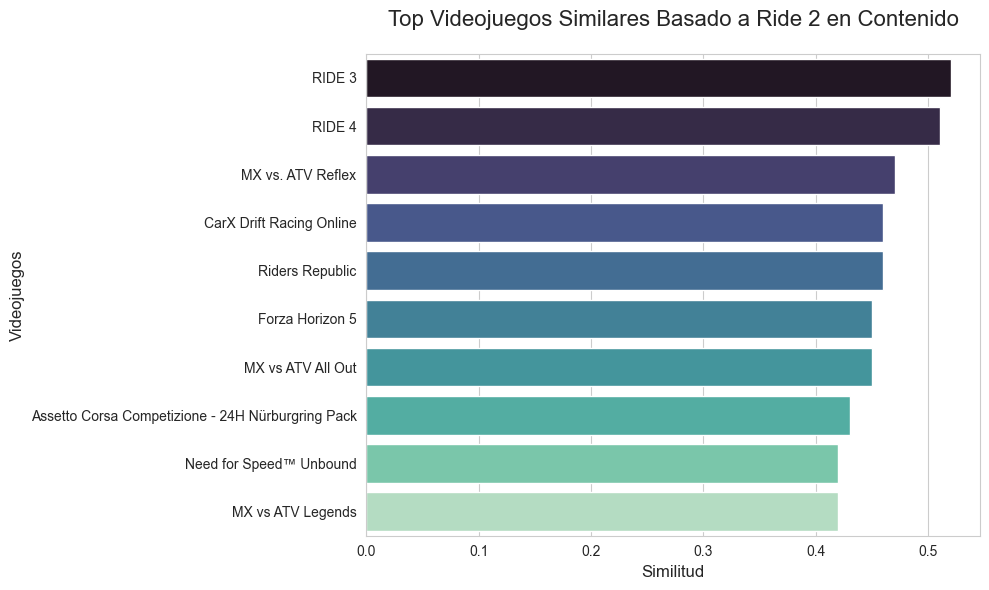

In [31]:
indice_peli = sr.recomendacion_videojuego(similarity, df)
indice_peli

______________________________________________

### **Caso 2: Sistema de Recomendación Basado en Popularidad**

In [143]:
df_ranking = pd.read_csv("datos/games_ranking.csv")
df_description = pd.read_csv("datos/games_description.csv")
df_ranking.head(2)

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2


In [144]:
df_description.head(1)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...


Pasamos la columna `overall_player_rating` a numérica, aquellos valores que no tengan sentido los eliminamos:

In [145]:
mapping_overall_player_rating = {
    'Overwhelmingly Positive': 6,
    'Very Positive': 5,
    'Mostly Positive': 4,
    'Positive': 3,
    'Mixed': 2,
    'Mostly Negative': 1,
    'Very Negative': 0,
    '7 user reviews': None,
    '1 user reviews': None,
    '6 user reviews': None,
    '4 user reviews': None
}

In [146]:
df_description["overall_player_rating"] = df_description["overall_player_rating"].map(mapping_overall_player_rating)
df_description.dropna(subset=["overall_player_rating"], inplace=True)

Convertimos la columna `number_of_english_reviews` a una variable numérica:

In [147]:
df_description["number_of_english_reviews"] = df_description["number_of_english_reviews"].str.replace(",","").astype(int)

Del dataframe de ranking solo nos interesan las columnas de `game_name` y `genre`:

In [148]:
df_genre = df_ranking[["game_name", "genre"]].drop_duplicates()
df_genre.head(1)

,game_name,genre
0,Counter-Strike 2,Action


Finalmente hacemos un inner join de ambos dataframes para obtener el campo de `genre` a través del cual queremos hacer recomendaciones y los campos de `overall_player_rating` y `number_of_english_reviews`, en los cuales nos vamos a basar para hacer las recomendaciones.

Primero observamos que los tamaños de las listas es distinto, por lo que comprobamos si todos los titulos del dataframe de menor tamaño están en el de mayor, si es así hacemos un inner join.

In [149]:
print(df_genre.shape)
print(df_description.shape)

(405, 2)
(286, 13)


In [150]:
l_genre = list(df_genre["game_name"].unique())
l_descrip = list(df_description["name"].unique())

print("Todos están" if all(game in l_genre for game in l_descrip) else "No todos están")

Todos están


Podemos proceder a hacer un inner join, también podríamos hacer in left join sobre la de menor tamaño.

In [169]:
df_merged = df_genre.merge(df_description, left_on="game_name", right_on="name", how='inner')
df_popularidad = df_merged[["game_name", "genre", 'overall_player_rating','number_of_english_reviews']]
df_popularidad.head()

,game_name,genre,overall_player_rating,number_of_english_reviews
0,Counter-Strike 2,Action,5.0,2258990
1,"Warhammer 40,000: Space Marine 2",Action,5.0,51920
2,Cyberpunk 2077,Action,5.0,324124
3,Black Myth: Wukong,Action,6.0,51931
4,ELDEN RING,Action,5.0,491741


In [224]:
sr.recomendacion_popularidad(df_popularidad)

Las 10 películas más recomendadas en base a overall_player_rating para el género Action son:


,game_name
0,Terraria
1,Left 4 Dead 2
2,The Witcher 3: Wild Hunt
3,Wallpaper Engine
4,The Forest
5,Deep Rock Galactic
6,Portal 2
7,Borderlands 2
8,Hollow Knight
9,Hades
